In [1]:
from modERec import EnergyRec
import numpy as np
import matplotlib.pyplot as plt

* EnergyRec default values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01




In [2]:
sim_dir = '/mnt/d/Pesquisa/GRAND/simulation/chuv_estrela/80deg/sim100001'

In [3]:
#EnergyRec.f_thres = 1e-3
def quantities(sim_dir):
    rec1 = EnergyRec(sim_dir)

    rec1.Eval_geo_ce_fluences()

    fluence_geo = rec1.fluence_geo
    fluence_ce = rec1.fluence_ce

    n_ant = len(rec1.GRANDshower.fields)
    eB = rec1.GRANDshower.geomagnet.xyz.value/np.linalg.norm(rec1.GRANDshower.geomagnet.xyz.value)
    alpha = np.zeros(n_ant) + np.arccos(np.dot(rec1.shower.ev,eB))
    distance = np.linalg.norm((rec1.shower.r_proj - rec1.shower.r_Core_proj)[:,0:2],axis=1)
    d_Xmax = np.zeros(n_ant) +  np.linalg.norm((rec1.GRANDshower.core - rec1.GRANDshower.maximum).xyz.value)
    rho_Xmax = np.zeros(n_ant) + rec1.SymFit.rho(d_Xmax[0],-rec1.shower.ev)
    
    return fluence_geo, fluence_ce, alpha, distance, d_Xmax, rho_Xmax

In [4]:
fluence_geo = np.array([])
fluence_ce = np.array([])
alpha = np.array([])
distance = np.array([])
d_Xmax = np.array([])
rho_Xmax = np.array([])

In [5]:
for i in range(100001,100021):
    sim_dir = '/mnt/d/Pesquisa/GRAND/simulation/chuv_estrela/80deg/sim' + str(i)

    f_geo, f_ce, a, d, d_max, rho_max = quantities(sim_dir)
    fluence_geo = np.append(fluence_geo,f_geo)
    fluence_ce = np.append(fluence_ce,f_ce)
    alpha = np.append(alpha,a)
    distance = np.append(distance,d)
    d_Xmax = np.append(d_Xmax,d_max)
    rho_Xmax = np.append(rho_Xmax,rho_max)

* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
--> Early-late correction will be applied 

* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;


* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
--> Early-late correction will be applied 

* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;


* En

--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;


* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
--> Early-late correction will be applied 

* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;


* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
--> Early-late correction will be applied 

* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 

In [6]:
bestfit = EnergyRec.SymFit.a_ratio_fit(fluence_geo, fluence_ce,alpha, distance, d_Xmax, rho_Xmax)
print(EnergyRec.SymFit.a_ratio_chi2(bestfit,fluence_geo, fluence_ce,alpha, distance, d_Xmax, rho_Xmax))
print(bestfit)

0.0036865361759259667
[2.82792856e-02 3.87232813e+02 3.41517427e-01 1.57011060e-01]


In [7]:
print(bestfit)

[2.82792856e-02 3.87232813e+02 3.41517427e-01 1.57011060e-01]


In [8]:
#bestfit = np.array([2.82792856e-02 3.87232813e+02 3.41517427e-01 1.57011060e-01])
rec1 = EnergyRec(sim_dir)

rec1.Eval_geo_ce_fluences()
fluence_par = rec1.Eval_par_fluences(bestfit)

* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
--> Early-late correction will be applied 

* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;




In [9]:
distance = np.linalg.norm((rec1.shower.r_proj - rec1.shower.r_Core_proj)[:,0:2],axis=1)
d_Xmax = np.linalg.norm((rec1.GRANDshower.core - rec1.GRANDshower.maximum).xyz.value)
rho_Xmax = rec1.SymFit.rho(d_Xmax,-rec1.shower.ev)
#plt.plot(distance,fluence_arr_unc,"g*",label="raw")
#plt.plot(distance,fluence_arr,"b*",label = "early late corr")

#plt.ylim(0.01,20)
#plt.xlim(0,1500)
#plt.gca().set_yscale('log')
#plt.xlabel("dist. in m")
#plt.ylabel("fluence eV/m$^2$")

#plt.legend()

-0.0014882881324554693 0.044855093951600096


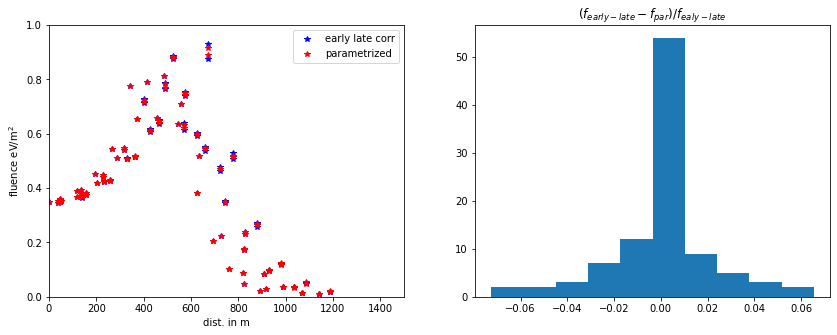

In [10]:
plt.figure(figsize=[14,5])
distance = np.linalg.norm((rec1.shower.r_proj - rec1.shower.r_Core_proj)[:,0:2],axis=1)
sel = np.where(rec1.fluence_arr>0.01)
plt.subplot(121)
#plt.plot(distance,fluence_evB_unc,"g*", label="raw")
plt.plot(distance[sel],rec1.fluence_evB[sel],"b*", label = "early late corr")
plt.plot(distance[sel],fluence_par[sel],"r*", label = "parametrized")

plt.ylim(0,1)
plt.xlim(0,1500)

plt.xlabel("dist. in m")
plt.ylabel("fluence eV/m$^2$")

plt.legend()

#plt.gca().set_yscale('log')

plt.subplot(122)

diff = (rec1.fluence_evB - fluence_par)/rec1.fluence_evB
plt.hist(diff[sel],10)
plt.title("($f_{early-late}-f_{par})/f_{ealy-late}$")

print(np.mean(diff),np.std(diff))

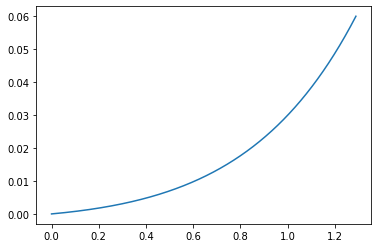

In [11]:
dist = np.array(range(1500))
par = [0.373, 762.6, 0.149, 0.189]
a_ratio = rec1.SymFit.a_ratio(dist, d_Xmax, par, rho_Xmax)
den = np.exp((rho_Xmax-0.4)/0.149)-0.189
plt.plot(dist/d_Xmax*180/np.pi,a_ratio/den)

In [12]:
sel = np.where(fluence_par>0)
ldf_bestfit = rec1.SymFit.SymLDF_fit(distance[sel],fluence_par[sel])

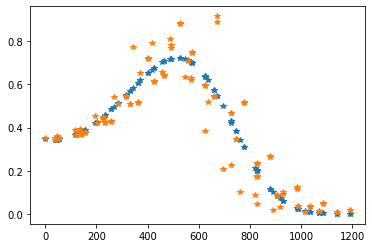

In [13]:
f_par = rec1.SymFit.SymLDF(ldf_bestfit,distance)
plt.plot(distance[sel],f_par[sel],"*")
plt.plot(distance[sel],fluence_par[sel],"*")